Task: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

Step-1: Load the dataset into the environment

In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('bank-full.csv')

Step-2: Cleaning the dataset

In [3]:
print(data.columns)

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')


In [4]:
# we got to know that all columns are present in same column. this doesn't contribute to the algorithm. So we need to split the columns

# split columns using a delimiter
split_cols=data['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';',expand=True)

split_cols.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
                      'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 
                      'poutcome', 'y']
data=pd.concat([data.drop('age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"',axis=1),split_cols],axis=1)
print(data.head())
# save the new DataFrame with separated columns
data.to_csv('data_cleaned.csv',index=False)

  age             job    marital    education default balance housing   loan  \
0  58    "management"  "married"   "tertiary"    "no"    2143   "yes"   "no"   
1  44    "technician"   "single"  "secondary"    "no"      29   "yes"   "no"   
2  33  "entrepreneur"  "married"  "secondary"    "no"       2   "yes"  "yes"   
3  47   "blue-collar"  "married"    "unknown"    "no"    1506   "yes"   "no"   
4  33       "unknown"   "single"    "unknown"    "no"       1    "no"   "no"   

     contact day  month duration campaign pdays previous   poutcome     y  
0  "unknown"   5  "may"      261        1    -1        0  "unknown"  "no"  
1  "unknown"   5  "may"      151        1    -1        0  "unknown"  "no"  
2  "unknown"   5  "may"       76        1    -1        0  "unknown"  "no"  
3  "unknown"   5  "may"       92        1    -1        0  "unknown"  "no"  
4  "unknown"   5  "may"      198        1    -1        0  "unknown"  "no"  


In [5]:
# creating a new dataframe for the cleaned dataset
df_cleaned=pd.read_csv('data_cleaned.csv')
print(df_cleaned.head())
print(df_cleaned.dtypes)

   age             job    marital    education default  balance housing  \
0   58    "management"  "married"   "tertiary"    "no"     2143   "yes"   
1   44    "technician"   "single"  "secondary"    "no"       29   "yes"   
2   33  "entrepreneur"  "married"  "secondary"    "no"        2   "yes"   
3   47   "blue-collar"  "married"    "unknown"    "no"     1506   "yes"   
4   33       "unknown"   "single"    "unknown"    "no"        1    "no"   

    loan    contact  day  month  duration  campaign  pdays  previous  \
0   "no"  "unknown"    5  "may"       261         1     -1         0   
1   "no"  "unknown"    5  "may"       151         1     -1         0   
2  "yes"  "unknown"    5  "may"        76         1     -1         0   
3   "no"  "unknown"    5  "may"        92         1     -1         0   
4   "no"  "unknown"    5  "may"       198         1     -1         0   

    poutcome     y  
0  "unknown"  "no"  
1  "unknown"  "no"  
2  "unknown"  "no"  
3  "unknown"  "no"  
4  "unknown

In [6]:
# string columns are having data with double quotes
# we need to remove them
df_cleaned=df_cleaned.apply(lambda x: x.str.replace('"','') if x.dtype=="object" else x)
print(df_cleaned.head())
df_cleaned.to_csv('data_cleaned.csv',index=False)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [7]:
# replacing the "unknown" value with ""
df_cleaned=df_cleaned.apply(lambda x: x.str.replace('unknown','') if x.dtype=="object" else x)
# replacing the empty string with null values
df_cleaned.replace("", np.nan, inplace=True)
df_cleaned.to_csv('data_cleaned.csv',index=False)

In [8]:
# checking for null values in the dataset
print(df_cleaned.isnull().sum())


age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


In [9]:
# we got to know that some columns have missing values and all of them are string/ object type columns
# so we replace them with either the previous or latter cell value
df_cleaned['job'] = df_cleaned['job'].fillna(method='ffill').fillna(method='bfill')
df_cleaned['education'] = df_cleaned['education'].fillna(method='ffill').fillna(method='bfill')
df_cleaned['contact'] = df_cleaned['contact'].fillna(method='ffill').fillna(method='bfill')
df_cleaned['poutcome'] = df_cleaned['poutcome'].fillna(method='ffill').fillna(method='bfill')

C:\Users\saisa\AppData\Local\Temp\ipykernel_8808\3725330469.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['job'] = df_cleaned['job'].fillna(method='ffill').fillna(method='bfill')
C:\Users\saisa\AppData\Local\Temp\ipykernel_8808\3725330469.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['education'] = df_cleaned['education'].fillna(method='ffill').fillna(method='bfill')
C:\Users\saisa\AppData\Local\Temp\ipykernel_8808\3725330469.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['contact'] = df_cleaned['contact'].fillna(method='ffill').fillna(method='bfill')
C:\Users\saisa\AppData\Local\Temp\ipykernel_8808\3725330469.py:6: FutureWarning: Series.fillna with 'method' is deprecated an

In [10]:
# cross checking if there are any missing values left
print(df_cleaned.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [11]:
# saving the work into the csv file previously made
df_cleaned.to_csv('data_cleaned.csv',index=False)

Step-3: Making a decision tree

In [12]:
# importing the required libraries for making decision tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

In [13]:
# assuming 'y' as target variable and rest are features
x=df_cleaned.drop('y',axis=1)
y=df_cleaned['y']

x=pd.get_dummies(x,drop_first=True)
# encoding categorical variables
print(df_cleaned['marital'].unique())
df_cleaned['marital']=df_cleaned['marital'].map({'married':0, 'divorced':1,'single':2}).fillna(-1)
print(df_cleaned['job'].unique())
df_cleaned['job']=df_cleaned['job'].map({'management':0, 'technician':1, 'entrepreneur':2, 'blue-collar':3, 'retired':4, 'admin.':5,
 'services':6, 'self-employed':7, 'unemployed':8, 'housemaid':9, 'student':10}).fillna(-1)
print(df_cleaned['education'].unique())
df_cleaned['education']=df_cleaned['education'].map({'primary':0,'secondary':1,'tertiary':2}).fillna(-1)
print(df_cleaned['default'].unique())
df_cleaned['default']=df_cleaned['default'].map({'yes':0,'no':1}).fillna(-1)
print(df_cleaned['housing'].unique())
df_cleaned['housing']=df_cleaned['housing'].map({'yes':0,'no':1}).fillna(-1)
print(df_cleaned['loan'].unique())
df_cleaned['loan']=df_cleaned['loan'].map({'yes':0,'no':1}).fillna(-1)
print(df_cleaned['contact'].unique())
df_cleaned['contact']=df_cleaned['contact'].map({'cellular':0,'telephone':1}).fillna(-1)
print(df_cleaned['poutcome'].unique())
df_cleaned['poutcome']=df_cleaned['poutcome'].map({'success':0,'failure':1,'other':2}).fillna(-1)

['married' 'single' 'divorced']
['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
['tertiary' 'secondary' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['cellular' 'telephone']
['failure' 'other' 'success']


In [14]:
class_labels=y.unique()
# split the data into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# initialise the decision after tree classifier
clf=DecisionTreeClassifier(random_state=42, max_depth=4) # restricting the tree depth for simplicity

# train the classifier
clf.fit(x_train,y_train)

# make predictions on the test set
y_pred=clf.predict(x_test)

# evaluate the model
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred,labels=class_labels))

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 90.09%
Confusion Matrix:
[[11640   326]
 [ 1018   580]]

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95     11966
         yes       0.64      0.36      0.46      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



Visualizing the decision tree for the model we have trained

In [15]:
# importing required libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


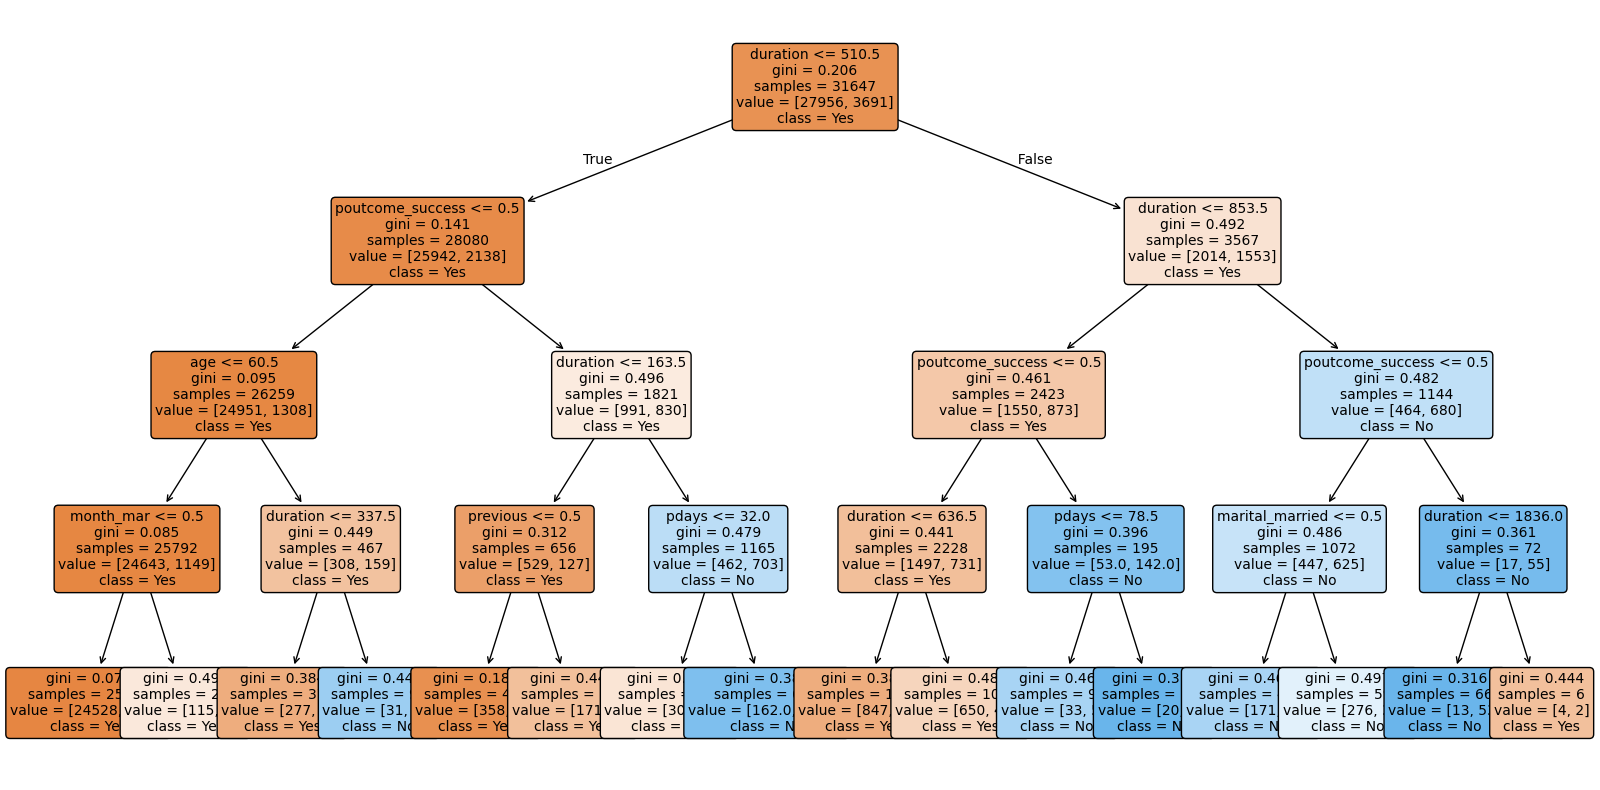

In [16]:
plt.figure(figsize=(20,10))
plot_tree(clf,filled=True,feature_names=x.columns, class_names=['Yes','No'], rounded=True, fontsize=10)
plt.show()